<a href="https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=Feature%20Selection%20is%20the%20process,learn%20based%20on%20irrelevant%20features.">Feature selection</a><br>
<a href="https://en.wikipedia.org/wiki/Chi-squared_test">Chi square test</a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('mobile_train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
data.shape

(2000, 21)

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
x=data.iloc[:,:20]
y=data.iloc[:,-1]
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [14]:
best_features=SelectKBest(score_func=chi2,k=10)
best_features

SelectKBest(score_func=<function chi2 at 0x000002C6BD56ECA0>)

In [16]:
fit=best_features.fit(x,y)
fit.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [17]:
df=pd.DataFrame(fit.scores_)

In [23]:
df

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [24]:
df.sort_values(0,ascending=True)

,0
17,0.327643
19,0.422091
3,0.631011
2,0.648366
1,0.723232
7,0.745820
5,1.521572
18,1.928429
9,9.097556
10,9.186054


In [25]:
df_columns=pd.DataFrame(x.columns)
df_columns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [29]:
data_mix=pd.concat([df,df_columns],axis=1)
data_mix

,0,0
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [32]:
data_mix.columns=['score','Features']
data_mix

,score,Features
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores


In [33]:
data_mix.sort_values('score',ascending=True)

,score,Features
17,0.327643,three_g
19,0.422091,wifi
3,0.631011,dual_sim
2,0.648366,clock_speed
1,0.723232,blue
7,0.745820,m_dep
5,1.521572,four_g
18,1.928429,touch_screen
9,9.097556,n_cores
10,9.186054,pc


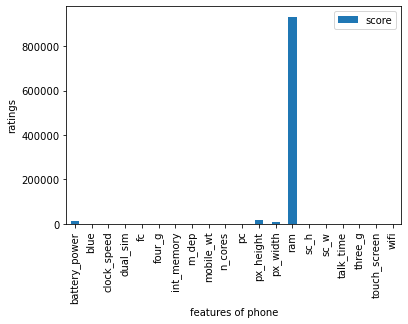

In [41]:
data_mix.plot(x='Features',y='score',kind='bar')%colors
plt.xlabel('features of phone')
plt.ylabel('ratings')
plt.show()